In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np

In [54]:
df = pd.read_csv('D:\\high performance project\\project\\dataset final\\final_data.csv')

In [58]:
df

,Employee ID,Full Name,Date of Birth,Gender,Education Level,Hire Date,Department,Job Title,Organization Level,Region,Country,Latitude,Longitude,Employment Status,Employment Type,Base Salary ($),Times Promoted,Current Employment Status,Annual Leave Entitlement (days),Ethnicity,Tenure (Years),Age (Years),Age Band,Tenure Band,Salary Band,Performance Review Year,Performance Rating,Projects Handled,Project Target,Working Hours,Overtime,Team Size,Potential Rating,Satisfaction Score,Incentive Amount ($),Bonus ($),Incentive Amount ($) Band,Bonus ($) Band,Satisfaction Score Band,Team Size Band,Performance Rating Band,Projects Handled Band,Project Target Band,Working Hours Band,Overtime Band
0,1001,Kyle Martin,1987-10-07,Female,Associate's,2021-11-17,IT,IT Support Specialist,Entry,Asia,Bangladesh,23.6850,90.3563,Remote,Full-time,75020.35,3,Active,22,BD-Tribal,3,37,36-45,1-3 Years,75K-100K,2023,2.000000,32,33,1935.000000,182.333333,15.000000,High,2.333333,5230.11,5916.57,5K-10K,5K-10K,Medium,11-15,Below Average,21-40,21-40,1901-2100,151-200
1,1002,Nicole Young,2002-06-03,Male,Associate's,2020-08-13,IT,Software Engineer,Operational,North America,USA,37.7749,-122.4194,Remote,Part-time,142825.60,4,Active,15,White,4,22,18-25,4-6 Years,125K-150K,2023,1.500000,40,46,1876.750000,243.000000,8.750000,High,3.250000,3720.93,5695.42,500-5K,5K-10K,High,6-10,Below Average,21-40,41-60,1701-1900,Above 200
2,1003,Ibrahim Ortmann-Boucsein,1964-05-31,Female,Bachelor's,2018-11-11,R&D,Research Scientist,Mid-Level,Europe,Germany,52.5200,13.4050,Onsite,Full-time,51685.81,1,Active,22,Germany-Other,6,60,56-66,4-6 Years,50K-75K,2023,2.166667,63,73,1867.500000,110.333333,10.666667,Low,3.666667,8385.40,13193.52,5K-10K,10K-20K,High,11-15,Average,61-80,61-80,1701-1900,101-150
3,1004,Lawrence Rahman-Browne,1976-06-20,Female,Master's,2021-06-12,Sales,Sales Representative,Entry,Europe,UK,51.5074,-0.1278,Onsite,Full-time,97875.70,2,Active,18,White British,3,48,46-55,1-3 Years,75K-100K,2023,1.666667,32,35,1885.666667,47.333333,11.333333,High,3.333333,3546.55,4792.82,500-5K,500-5K,High,11-15,Below Average,21-40,21-40,1701-1900,0-50
4,1005,Eric Torres,1987-06-21,Female,Doctorate,2019-04-20,IT,IT Support Specialist,Entry,Asia,Bangladesh,23.6850,90.3563,Remote,Full-time,127402.39,3,Active,15,Bengali,5,37,36-45,4-6 Years,125K-150K,2023,2.000000,53,62,2019.200000,109.000000,13.200000,High,3.400000,7823.06,9518.18,5K-10K,5K-10K,High,11-15,Below Average,41-60,61-80,1901-2100,101-150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,2796,Burkhard Kohl-Fröhlich,1981-11-23,Female,High School,2019-07-15,Marketing,Marketing Coordinator,Entry,Europe,Germany,52.5200,13.4050,Onsite,Full-time,74185.47,1,Active,22,German,5,43,36-45,4-6 Years,50K-75K,2023,2.400000,53,61,1894.000000,144.400000,6.800000,High,3.600000,8792.61,11606.87,5K-10K,10K-20K,High,6-10,Average,41-60,61-80,1701-1900,101-150
1796,2797,Jake Byrne-Moore,2006-10-27,Male,Associate's,2022-09-16,Sales,Sales Representative,Entry,Europe,UK,51.5074,-0.1278,Remote,Full-time,82809.56,1,Resigned,18,White British,1,18,18-25,1-3 Years,75K-100K,2023,2.000000,20,27,1644.000000,85.500000,14.500000,High,4.500000,2287.32,3568.31,500-5K,500-5K,Very High,11-15,Below Average,10-20,21-40,1501-1700,51-100
1797,2798,Nachiket Bahri,1971-04-27,Female,Master's,2019-07-11,Finance,Financial Analyst,Operational,Asia,India,28.7041,77.1025,Remote,Full-time,77760.84,0,Resigned,18,Indo-Aryan,2,53,46-55,1-3 Years,75K-100K,2023,1.200000,57,67,1709.600000,142.200000,11.800000,High,1.600000,4129.95,6339.42,500-5K,5K-10K,Low,11-15,Below Average,41-60,61-80,1701-1900,101-150
1798,2799,Dr Robin Hopkins,1985-10-11,Other,Associate's,2021-09-20,Sales,Account Executive,Operational,Europe,UK,51.5074,-0.1278,Onsite,Full-time,119883.91,1,Active,18,White British,3,39,36-45,1-3 Years,100K-125K,2023,2.666667,30,37,1909.000000,243.666667

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Employee ID                      1800 non-null   int64  
 1   Full Name                        1800 non-null   object 
 2   Date of Birth                    1800 non-null   object 
 3   Gender                           1800 non-null   object 
 4   Education Level                  1800 non-null   object 
 5   Hire Date                        1800 non-null   object 
 6   Department                       1800 non-null   object 
 7   Job Title                        1800 non-null   object 
 8   Organization Level               1800 non-null   object 
 9   Region                           1800 non-null   object 
 10  Country                          1800 non-null   object 
 11  Latitude                         1800 non-null   float64
 12  Longitude           

In [28]:
df.drop(['Employee ID'], axis=1, inplace=True)

In [29]:
df

,Full Name,Date of Birth,Gender,Education Level,Hire Date,Department,Job Title,Organization Level,Region,Country,Latitude,Longitude,Employment Status,Employment Type,Base Salary ($),Times Promoted,Current Employment Status,Annual Leave Entitlement (days),Ethnicity,Tenure (Years),Age (Years),Age Band,Tenure Band,Salary Band,Performance Review Year,Performance Rating,Projects Handled,Project Target,Working Hours,Overtime,Team Size,Potential Rating,Satisfaction Score,Incentive Amount ($),Bonus ($),Incentive Amount ($) Band,Bonus ($) Band,Satisfaction Score Band,Team Size Band,Performance Rating Band,Projects Handled Band,Project Target Band,Working Hours Band,Overtime Band
0,Kyle Martin,1987-10-07,Female,Associate's,2021-11-17,IT,IT Support Specialist,Entry,Asia,Bangladesh,23.6850,90.3563,Remote,Full-time,75020.35,3,Active,22,BD-Tribal,3,37,36-45,1-3 Years,75K-100K,2023,2.000000,32,33,1935.000000,182.333333,15.000000,High,2.333333,5230.11,5916.57,5K-10K,5K-10K,Medium,11-15,Below Average,21-40,21-40,1901-2100,151-200
1,Nicole Young,2002-06-03,Male,Associate's,2020-08-13,IT,Software Engineer,Operational,North America,USA,37.7749,-122.4194,Remote,Part-time,142825.60,4,Active,15,White,4,22,18-25,4-6 Years,125K-150K,2023,1.500000,40,46,1876.750000,243.000000,8.750000,High,3.250000,3720.93,5695.42,500-5K,5K-10K,High,6-10,Below Average,21-40,41-60,1701-1900,Above 200
2,Ibrahim Ortmann-Boucsein,1964-05-31,Female,Bachelor's,2018-11-11,R&D,Research Scientist,Mid-Level,Europe,Germany,52.5200,13.4050,Onsite,Full-time,51685.81,1,Active,22,Germany-Other,6,60,56-66,4-6 Years,50K-75K,2023,2.166667,63,73,1867.500000,110.333333,10.666667,Low,3.666667,8385.40,13193.52,5K-10K,10K-20K,High,11-15,Average,61-80,61-80,1701-1900,101-150
3,Lawrence Rahman-Browne,1976-06-20,Female,Master's,2021-06-12,Sales,Sales Representative,Entry,Europe,UK,51.5074,-0.1278,Onsite,Full-time,97875.70,2,Active,18,White British,3,48,46-55,1-3 Years,75K-100K,2023,1.666667,32,35,1885.666667,47.333333,11.333333,High,3.333333,3546.55,4792.82,500-5K,500-5K,High,11-15,Below Average,21-40,21-40,1701-1900,0-50
4,Eric Torres,1987-06-21,Female,Doctorate,2019-04-20,IT,IT Support Specialist,Entry,Asia,Bangladesh,23.6850,90.3563,Remote,Full-time,127402.39,3,Active,15,Bengali,5,37,36-45,4-6 Years,125K-150K,2023,2.000000,53,62,2019.200000,109.000000,13.200000,High,3.400000,7823.06,9518.18,5K-10K,5K-10K,High,11-15,Below Average,41-60,61-80,1901-2100,101-150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,Burkhard Kohl-Fröhlich,1981-11-23,Female,High School,2019-07-15,Marketing,Marketing Coordinator,Entry,Europe,Germany,52.5200,13.4050,Onsite,Full-time,74185.47,1,Active,22,German,5,43,36-45,4-6 Years,50K-75K,2023,2.400000,53,61,1894.000000,144.400000,6.800000,High,3.600000,8792.61,11606.87,5K-10K,10K-20K,High,6-10,Average,41-60,61-80,1701-1900,101-150
1796,Jake Byrne-Moore,2006-10-27,Male,Associate's,2022-09-16,Sales,Sales Representative,Entry,Europe,UK,51.5074,-0.1278,Remote,Full-time,82809.56,1,Resigned,18,White British,1,18,18-25,1-3 Years,75K-100K,2023,2.000000,20,27,1644.000000,85.500000,14.500000,High,4.500000,2287.32,3568.31,500-5K,500-5K,Very High,11-15,Below Average,10-20,21-40,1501-1700,51-100
1797,Nachiket Bahri,1971-04-27,Female,Master's,2019-07-11,Finance,Financial Analyst,Operational,Asia,India,28.7041,77.1025,Remote,Full-time,77760.84,0,Resigned,18,Indo-Aryan,2,53,46-55,1-3 Years,75K-100K,2023,1.200000,57,67,1709.600000,142.200000,11.800000,High,1.600000,4129.95,6339.42,500-5K,5K-10K,Low,11-15,Below Average,41-60,61-80,1701-1900,101-150
1798,Dr Robin Hopkins,1985-10-11,Other,Associate's,2021-09-20,Sales,Account Executive,Operational,Europe,UK,51.5074,-0.1278,Onsite,Full-time,119883.91,1,Active,18,White British,3,39,36-45,1-3 Years,100K-125K,2023,2.666667,30,37,1909.000000,243.666667,11.666667,Moderate,3.666667,5712.63,7474.39,5K-10K,5K-10K,Hi

In [30]:
le= LabelEncoder()
df['Gender']= le.fit_transform(df['Gender'])
df['Education Level']= le.fit_transform(df['Education Level'])
df['Department']= le.fit_transform(df['Department'])
df['Job Title']= le.fit_transform(df['Job Title'])
df['Organization Level']= le.fit_transform(df['Organization Level'])
df['Region']= le.fit_transform(df['Region'])
df['Country']= le.fit_transform(df['Country'])
df['Employment Status']= le.fit_transform(df['Employment Status'])
df['Employment Type']= le.fit_transform(df['Employment Type'])
df['Current Employment Status']= le.fit_transform(df['Current Employment Status'])
df['Ethnicity']= le.fit_transform(df['Ethnicity'])
df['Salary Band']= le.fit_transform(df['Salary Band'])
df['Incentive Amount ($) Band']= le.fit_transform(df['Incentive Amount ($) Band'])
df['Bonus ($) Band']= le.fit_transform(df['Bonus ($) Band'])
df['Working Hours Band']= le.fit_transform(df['Working Hours Band'])
df['Overtime Band']= le.fit_transform(df['Overtime Band'])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Full Name                        1800 non-null   object 
 1   Date of Birth                    1800 non-null   object 
 2   Gender                           1800 non-null   int32  
 3   Education Level                  1800 non-null   int32  
 4   Hire Date                        1800 non-null   object 
 5   Department                       1800 non-null   int32  
 6   Job Title                        1800 non-null   int32  
 7   Organization Level               1800 non-null   int32  
 8   Region                           1800 non-null   int32  
 9   Country                          1800 non-null   int32  
 10  Latitude                         1800 non-null   float64
 11  Longitude                        1800 non-null   float64
 12  Employment Status   

In [32]:
Y=df['Current Employment Status']

In [33]:
print(df.columns)

Index(['Full Name', 'Date of Birth', 'Gender', 'Education Level', 'Hire Date',
       'Department', 'Job Title', 'Organization Level', 'Region', 'Country',
       'Latitude', 'Longitude', 'Employment Status', 'Employment Type',
       'Base Salary ($)', 'Times Promoted', 'Current Employment Status',
       'Annual Leave Entitlement (days)', 'Ethnicity', 'Tenure (Years)',
       'Age (Years)', 'Age Band', 'Tenure Band', 'Salary Band',
       'Performance Review Year', 'Performance Rating', 'Projects Handled',
       'Project Target', 'Working Hours', 'Overtime', 'Team Size',
       'Potential Rating', 'Satisfaction Score', 'Incentive Amount ($)',
       'Bonus ($)', 'Incentive Amount ($) Band', 'Bonus ($) Band',
       'Satisfaction Score Band', 'Team Size Band', 'Performance Rating Band',
       'Projects Handled Band', 'Project Target Band', 'Working Hours Band',
       'Overtime Band'],
      dtype='object')


In [34]:
ind_vars= ['Gender', 'Education Level', 'Department', 'Job Title',
       'Organization Level', 'Region', 'Country', 'Employment Status',
       'Employment Type', 'Times Promoted', 'Current Employment Status',
       'Ethnicity', 'Tenure (Years)', 'Age (Years)', 'Salary Band',
       'Performance Rating', 'Projects Handled', 'Project Target', 'Team Size',
       'Satisfaction Score', 'Incentive Amount ($) Band', 'Bonus ($) Band',
       'Working Hours Band', 'Overtime Band']

In [35]:
X= df[ind_vars]

In [36]:
x_train, x_test, y_train, y_test= train_test_split(X,Y)

In [37]:
dc= tree.DecisionTreeClassifier()
dc.fit(x_train, y_train)
y_predict=dc.predict(X)
y_prob= dc.predict_proba(X)[:,1]

In [38]:
df['Predict']= y_predict

In [39]:
df['Probability']= y_prob

In [40]:
df

,Full Name,Date of Birth,Gender,Education Level,Hire Date,Department,Job Title,Organization Level,Region,Country,Latitude,Longitude,Employment Status,Employment Type,Base Salary ($),Times Promoted,Current Employment Status,Annual Leave Entitlement (days),Ethnicity,Tenure (Years),Age (Years),Age Band,Tenure Band,Salary Band,Performance Review Year,Performance Rating,Projects Handled,Project Target,Working Hours,Overtime,Team Size,Potential Rating,Satisfaction Score,Incentive Amount ($),Bonus ($),Incentive Amount ($) Band,Bonus ($) Band,Satisfaction Score Band,Team Size Band,Performance Rating Band,Projects Handled Band,Project Target Band,Working Hours Band,Overtime Band,Predict,Probability
0,Kyle Martin,1987-10-07,0,0,2021-11-17,2,7,0,0,0,23.6850,90.3563,1,0,75020.35,3,0,22,2,3,37,36-45,1-3 Years,4,2023,2.000000,32,33,1935.000000,182.333333,15.000000,High,2.333333,5230.11,5916.57,3,3,Medium,11-15,Below Average,21-40,21-40,3,2,0,0.0
1,Nicole Young,2002-06-03,1,0,2020-08-13,2,15,2,2,4,37.7749,-122.4194,1,1,142825.60,4,0,15,15,4,22,18-25,4-6 Years,1,2023,1.500000,40,46,1876.750000,243.000000,8.750000,High,3.250000,3720.93,5695.42,2,3,High,6-10,Below Average,21-40,41-60,2,4,0,0.0
2,Ibrahim Ortmann-Boucsein,1964-05-31,0,1,2018-11-11,5,12,1,1,1,52.5200,13.4050,0,0,51685.81,1,0,22,8,6,60,56-66,4-6 Years,3,2023,2.166667,63,73,1867.500000,110.333333,10.666667,Low,3.666667,8385.40,13193.52,3,0,High,11-15,Average,61-80,61-80,2,1,0,0.0
3,Lawrence Rahman-Browne,1976-06-20,0,4,2021-06-12,6,14,0,1,3,51.5074,-0.1278,0,0,97875.70,2,0,18,16,3,48,46-55,1-3 Years,4,2023,1.666667,32,35,1885.666667,47.333333,11.333333,High,3.333333,3546.55,4792.82,2,2,High,11-15,Below Average,21-40,21-40,2,0,0,0.0
4,Eric Torres,1987-06-21,0,2,2019-04-20,2,7,0,0,0,23.6850,90.3563,1,0,127402.39,3,0,15,3,5,37,36-45,4-6 Years,1,2023,2.000000,53,62,2019.200000,109.000000,13.200000,High,3.400000,7823.06,9518.18,3,3,High,11-15,Below Average,41-60,61-80,3,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,Burkhard Kohl-Fröhlich,1981-11-23,0,3,2019-07-15,3,9,0,1,1,52.5200,13.4050,0,0,74185.47,1,0,22,7,5,43,36-45,4-6 Years,3,2023,2.400000,53,61,1894.000000,144.400000,6.800000,High,3.600000,8792.61,11606.87,3,0,High,6-10,Average,41-60,61-80,2,1,0,0.0
1796,Jake Byrne-Moore,2006-10-27,1,0,2022-09-16,6,14,0,1,3,51.5074,-0.1278,1,0,82809.56,1,1,18,16,1,18,18-25,1-3 Years,4,2023,2.000000,20,27,1644.000000,85.500000,14.500000,High,4.500000,2287.32,3568.31,2,2,Very High,11-15,Below Average,10-20,21-40,1,3,1,1.0
1797,Nachiket Bahri,1971-04-27,0,4,2019-07-11,0,4,2,0,2,28.7041,77.1025,1,0,77760.84,0,1,18,11,2,53,46-55,1-3 Years,4,2023,1.200000,57,67,1709.600000,142.200000,11.800000,High,1.600000,4129.95,6339.42,2,3,Low,11-15,Below Average,41-60,61-80,2,1,1,1.0
1798,Dr Robin Hopkins,1985-10-11,2,0,2021-09-20,6,0,2,1,3,51.5074,-0.1278,0,0,119883.91,1,0,18,16,3,39,36-45,1-3 Years,0,2023,2.666667,30,37,1909.000000,243.666667,11.666667,Moderate,3.666667,5712.63,7474.39,3,3,High,11-15,Average,21-40,21-40,3,4,0,0.0


In [41]:
acc_train=np.sum(dc.predict(x_train)== y_train)/ float(y_train.size)

In [42]:
acc_test=np.sum(dc.predict(x_test)== y_test)/ float(y_test.size)

In [43]:
print('Train accuracy: ', acc_train)
print('Test accuracy: ', acc_test)

Train accuracy:  1.0
Test accuracy:  1.0


In [44]:
def one_hot_code(df, column):
    df=df.copy()
    dummies= pd.fet_dummies(df[column], orefix=column)
    df= pd.concat([df, dummies], axis=1)
    df= df.drop(column, axis=1)
    return df

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

def preprocess_inputs(df):
    df = df.copy()
    
    # Drop unnecessary columns
    if 'Predict' in df.columns and 'Probability' in df.columns:
        df = df.drop(['Predict', 'Probability'], axis=1)
    
    # Encode categorical variables
    categorical_cols = df.select_dtypes(include=['object']).columns  # Select non-numeric columns
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
    
    # Separate features and target
    y = df['Current Employment Status']
    X = df.drop('Current Employment Status', axis=1)
    
    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.7, shuffle=True, random_state=1
    )
    
    # Scale numerical features
    num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns  # Select numeric columns
    scaler = StandardScaler()
    X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
    X_test[num_cols] = scaler.transform(X_test[num_cols])
    
    return X_train, X_test, y_train, y_test

# Call the function
X_train, X_test, y_train, y_test = preprocess_inputs(df)

# Verify the output
print(X_train.head())
print(y_train.head())
X_train
X_test

In [47]:
models = {
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                        Neural Network": MLPClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


                   Logistic Regression trained.
                   K-Nearest Neighbors trained.
                         Decision Tree trained.


C:\Users\user\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                        Neural Network trained.
                         Random Forest trained.
                     Gradient Boosting trained.


In [48]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))

                   Logistic Regression: 97.22%
                   K-Nearest Neighbors: 86.85%
                         Decision Tree: 98.15%
Support Vector Machine (Linear Kernel): 89.44%
   Support Vector Machine (RBF Kernel): 87.78%
                        Neural Network: 95.00%
                         Random Forest: 98.33%
                     Gradient Boosting: 98.52%


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


In [ ]:
# Train the Gradient Boosting model with the best parameters
best_model = GradientBoostingClassifier(
    learning_rate=0.2,
    max_depth=3,
    n_estimators=100,
    subsample=0.8
)
best_model.fit(X_train, y_train, sample_weight=np.where(y_train == 1, 3, 1))


# Evaluate on the test set
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

# Other metrics
from sklearn.metrics import classification_report, roc_auc_score

y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score: {:.2f}".format(roc_auc_score(y_test, y_prob)))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

feature_importances = best_model.feature_importances_
sorted_idx = np.argsort(feature_importances)

plt.figure(figsize=(10, 8))
plt.barh(X_train.columns[sorted_idx], feature_importances[sorted_idx], color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Gradient Boosting Model")
plt.show()

In [ ]:
import joblib

# Save the model
joblib.dump(best_model, 'gradient_boosting_model.pkl')

# Load the model (when needed)
loaded_model = joblib.load('gradient_boosting_model.pkl')

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)

plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Metric")
plt.title("Precision-Recall vs. Threshold")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import f1_score

f1_scores = [f1_score(y_test, (y_prob >= t).astype(int)) for t in thresholds]
best_threshold = thresholds[np.argmax(f1_scores)]
print("Best Threshold:", best_threshold)


In [ ]:
y_pred_custom = (y_prob >= best_threshold).astype(int)
print("\nClassification Report with Custom Threshold:\n", classification_report(y_test, y_pred_custom))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

In [82]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import pandas as pd
import numpy as np

# Load and preprocess the dataset
df = pd.read_csv('D:\\high performance project\\project\\dataset final\\final_data.csv')
df.drop(['Employee ID', 'Full Name', 'Date of Birth', 'Hire Date',
       'Latitude', 'Longitude', 'Incentive Amount ($)', 'Bonus ($)',
       'Base Salary ($)', 'Annual Leave Entitlement (days)', 'Age Band', 'Tenure Band', 
       'Performance Review Year', 'Potential Rating', 'Satisfaction Score Band', 'Team Size Band', 'Performance Rating Band',
       'Projects Handled Band', 'Project Target Band', 'Working Hours',
       'Overtime'], axis=1, inplace=True)
# List of columns to round up
columns_to_round = ['Team Size', 'Satisfaction Score', 'Performance Rating']

# Apply rounding up (ceil) and convert to integers
df[columns_to_round] = df[columns_to_round].apply(np.ceil).astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Gender                     1800 non-null   object
 1   Education Level            1800 non-null   object
 2   Department                 1800 non-null   object
 3   Job Title                  1800 non-null   object
 4   Organization Level         1800 non-null   object
 5   Region                     1800 non-null   object
 6   Country                    1800 non-null   object
 7   Employment Status          1800 non-null   object
 8   Employment Type            1800 non-null   object
 9   Times Promoted             1800 non-null   int64 
 10  Current Employment Status  1800 non-null   object
 11  Ethnicity                  1800 non-null   object
 12  Tenure (Years)             1800 non-null   int64 
 13  Age (Years)                1800 non-null   int64 
 14  Salary B

In [65]:

# Encode categorical variables
for col in ['Gender', 'Education Level', 'Department', 'Job Title', 'Organization Level',
            'Region', 'Country', 'Employment Status', 'Employment Type',
            'Current Employment Status', 'Ethnicity', 'Salary Band',
            'Incentive Amount ($) Band', 'Bonus ($) Band', 'Working Hours Band', 
            'Overtime Band']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Preprocessing Function
def preprocess_inputs(df):
    df = df.copy()
    
    # Separate features and target
    y = df['Current Employment Status']
    X = df.drop('Current Employment Status', axis=1)
    
    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.1, shuffle=True, random_state=1
    )
    
    # Standardize only numerical columns (if applicable)
    scaler = StandardScaler()
    num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns  # Select numeric columns
    scaler.fit(X_train[num_cols])
    
    X_train[num_cols] = scaler.transform(X_train[num_cols])
    X_test[num_cols] = scaler.transform(X_test[num_cols])
    
    return X_train, X_test, y_train, y_test

# Preprocess inputs
X_train, X_test, y_train, y_test = preprocess_inputs(df)

# Initialize GradientBoostingClassifier with hyperparameters
gbc = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=1
)

# Train the model
gbc.fit(X_train, y_train)

# Predict labels and probabilities for the test set only
y_predict = gbc.predict(X_test)
y_prob = gbc.predict_proba(X_test)[:, 1]

# Evaluate model performance on the test set
print("Accuracy:", accuracy_score(y_test, y_predict))
print("AUC-ROC:", roc_auc_score(y_test, y_prob))
print("Classification Report:\n", classification_report(y_test, y_predict))

# Add Predict and Probability columns to a copy of the test DataFrame for analysis (optional)
test_results = X_test.copy()
test_results['Actual'] = y_test
test_results['Predict'] = y_predict
test_results['Probability'] = y_prob

# Display updated test results DataFrame (optional)
print(test_results.head())
test_results

Accuracy: 0.9302469135802469
AUC-ROC: 0.908398984287149
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      1407
           1       0.80      0.62      0.70       213

    accuracy                           0.93      1620
   macro avg       0.87      0.80      0.83      1620
weighted avg       0.93      0.93      0.93      1620

        Gender  Education Level  Department  Job Title  Organization Level  \
1462 -0.966595         1.492352    1.427068   1.024671           -1.267251   
510   0.845771         0.770246    0.924383   0.367518           -0.196335   
612  -0.966595         0.770246    0.924383   0.586569           -0.196335   
1322 -0.966595         0.048140    0.421697  -0.289634           -0.196335   
993   0.845771         1.492352   -0.583674   1.243721            0.874582   

        Region   Country  Employment Status  Employment Type  Times Promoted  \
1462  0.275589 -0.706105           1.081053 

,Gender,Education Level,Department,Job Title,Organization Level,Region,Country,Employment Status,Employment Type,Times Promoted,Ethnicity,Tenure (Years),Age (Years),Salary Band,Performance Rating,Projects Handled,Project Target,Team Size,Satisfaction Score,Incentive Amount ($) Band,Bonus ($) Band,Working Hours Band,Overtime Band,Actual,Predict,Probability
1462,-0.966595,1.492352,1.427068,1.024671,-1.267251,0.275589,-0.706105,1.081053,2.110579,0.096337,-0.354747,-1.028122,-1.580556,1.101616,3,-1.483736,-1.316483,11,5,-0.238399,0.157060,-1.012579,1.990202,0,0,0.013416
510,0.845771,0.770246,0.924383,0.367518,-0.196335,0.275589,0.771789,1.081053,-0.473804,-1.348713,-1.657898,-1.028122,0.844161,1.101616,2,-1.417068,-1.430739,4,3,-0.238399,0.157060,0.675053,1.008732,0,0,0.007255
612,-0.966595,0.770246,0.924383,0.586569,-0.196335,1.653535,1.510736,-0.925024,-0.473804,-0.626188,0.079637,-0.376495,0.991113,1.101616,3,-0.617050,-0.745203,10,4,0.736870,0.881954,0.675053,-0.954206,0,0,0.000540
1322,-0.966595,0.048140,0.421697,-0.289634,-0.196335,1.653535,1.510736,1.081053,-0.473804,0.818861,1.382788,-2.331375,0.403303,-2.231003,3,2.316347,2.625350,15,3,-1.213669,-1.292727,0.675053,-0.954206,1,1,0.994031
993,0.845771,1.492352,-0.583674,1.243721,0.874582,-1.102357,-1.445052,-0.925024,2.110579,0.818861,-1.223514,1.578385,-0.698841,-2.231003,3,1.382993,1.197149,7,5,0.736870,-1.292727,0.675053,0.027263,0,0,0.000510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,-0.966595,-1.396071,-1.589045,-1.165837,0.874582,1.653535,1.510736,1.081053,-0.473804,0.818861,1.382788,0.926758,-0.037555,0.268461,3,0.916316,0.911509,8,4,-2.188938,-1.292727,0.675053,-0.954206,0,0,0.000473
1236,-0.966595,-1.396071,0.421697,0.148468,-1.267251,0.275589,0.771789,-0.925024,-0.473804,0.096337,1.599980,-1.028122,0.403303,0.268461,3,2.183010,2.339710,13,4,1.712140,-1.292727,2.362685,-0.954206,1,0,0.462199
1764,0.845771,-1.396071,-0.080988,-0.070583,-1.267251,0.275589,-0.706105,1.081053,-0.473804,-0.626188,-0.354747,1.578385,-0.037555,0.268461,2,1.516329,1.197149,10,4,0.736870,0.881954,2.362685,-0.954206,0,0,0.000175
910,0.845771,-0.673965,-0.583674,1.243721,0.874582,-1.102357,0.032842,-0.925024,-0.473804,-0.626188,0.514021,0.926758,-1.139699,0.268461,2,0.649644,0.511613,11,4,0.736870,0.881954,0.675053,1.008732,0,0,0.000501


In [69]:
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

# Map weights to the target classes
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}

# Initialize GradientBoostingClassifier with class weights
gbc_weighted = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    random_state=1
)

# Train the weighted model
gbc_weighted.fit(X_train, y_train)

# Predict labels and probabilities for the test set
y_predict_weighted = gbc_weighted.predict(X_test)
y_prob_weighted = gbc_weighted.predict_proba(X_test)[:, 1]

# Evaluate performance
print("Accuracy (Weighted):", accuracy_score(y_test, y_predict_weighted))
print("AUC-ROC (Weighted):", roc_auc_score(y_test, y_prob_weighted))
print("Classification Report (Weighted):\n", classification_report(y_test, y_predict_weighted))


Accuracy (Weighted): 0.9351851851851852
AUC-ROC (Weighted): 0.9067439462646526
Classification Report (Weighted):
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      1407
           1       0.81      0.66      0.73       213

    accuracy                           0.94      1620
   macro avg       0.88      0.82      0.85      1620
weighted avg       0.93      0.94      0.93      1620



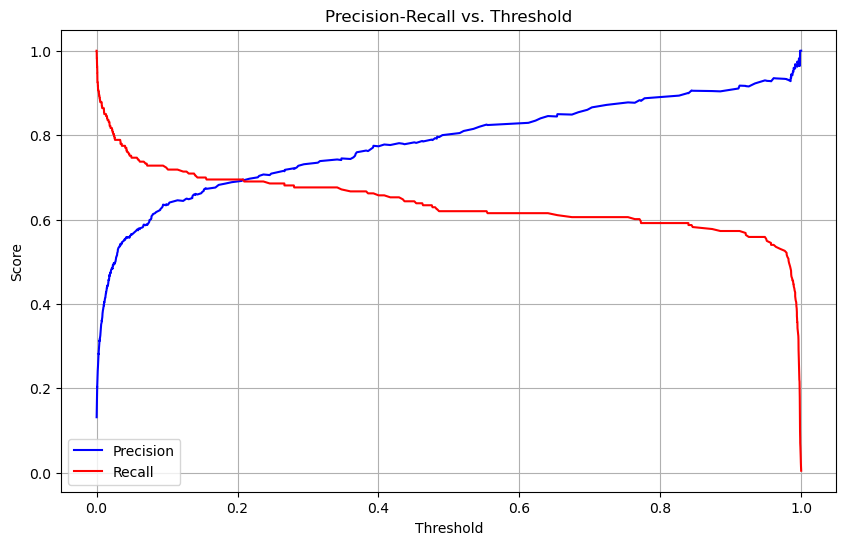

In [70]:
import numpy as np
from sklearn.metrics import precision_recall_curve, roc_curve

# Get prediction probabilities
y_prob = gbc.predict_proba(X_test)[:, 1]

# Analyze precision, recall, and thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)

# Plot Precision-Recall Curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions[:-1], label="Precision", color="blue")
plt.plot(thresholds, recalls[:-1], label="Recall", color="red")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs. Threshold")
plt.legend()
plt.grid()
plt.show()


In [72]:
import joblib

# Save the trained model
joblib.dump(gbc_weighted, 'employee_resignation_model.pkl')


['employee_resignation_model.pkl']

['feature_names.pkl']

In [77]:
import joblib

# Save the trained model
joblib.dump(gbc_weighted, 'employee_resignation_model.pkl')

# Save feature names from X_train
feature_names = X_train.columns.tolist()

# Save feature names to a file for future use
import joblib
joblib.dump(feature_names, 'feature_names.pkl')

# Save feature names from X_train
feature_names = X_train.columns.tolist()

# Save feature names to a file for future use
import joblib
joblib.dump(feature_names, 'feature_names.pkl')

['feature_names.pkl']

In [83]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import joblib

# Load and preprocess the dataset
df = pd.read_csv('D:\\high performance project\\project\\dataset final\\final_data.csv')

# Drop unnecessary columns
df.drop(
    [
        'Employee ID', 'Full Name', 'Date of Birth', 'Hire Date',
        'Latitude', 'Longitude', 'Incentive Amount ($)', 'Bonus ($)',
        'Base Salary ($)', 'Annual Leave Entitlement (days)', 'Age Band',
        'Tenure Band', 'Performance Review Year', 'Potential Rating',
        'Satisfaction Score Band', 'Team Size Band', 'Performance Rating Band',
        'Projects Handled Band', 'Project Target Band', 'Working Hours',
        'Overtime'
    ],
    axis=1,
    inplace=True
)

# List of columns to round up
columns_to_round = ['Team Size', 'Satisfaction Score', 'Performance Rating']

# Apply rounding up (ceil) and convert to integers
df[columns_to_round] = df[columns_to_round].apply(np.ceil).astype(int)

# Encode categorical variables using LabelEncoder
categorical_columns = [
    'Gender', 'Education Level', 'Department', 'Job Title',
    'Organization Level', 'Region', 'Country', 'Employment Status',
    'Employment Type', 'Current Employment Status', 'Ethnicity',
    'Salary Band', 'Incentive Amount ($) Band', 'Bonus ($) Band',
    'Working Hours Band', 'Overtime Band'
]

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Preprocessing function
def preprocess_inputs(df):
    df = df.copy()
    
    # Separate features and target
    y = df['Current Employment Status']
    X = df.drop('Current Employment Status', axis=1)
    
    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.1, shuffle=True, random_state=1
    )
    
    # Standardize only numerical columns (if applicable)
    scaler = StandardScaler()
    num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns  # Select numeric columns
    scaler.fit(X_train[num_cols])
    
    X_train[num_cols] = scaler.transform(X_train[num_cols])
    X_test[num_cols] = scaler.transform(X_test[num_cols])
    
    return X_train, X_test, y_train, y_test

# Preprocess inputs
X_train, X_test, y_train, y_test = preprocess_inputs(df)

# Calculate class weights for imbalance handling
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}

# Initialize GradientBoostingClassifier with class weights and hyperparameters
gbc_weighted = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    random_state=1
)

# Train the weighted model
gbc_weighted.fit(X_train, y_train)

# Predict labels and probabilities for the test set
y_predict_weighted = gbc_weighted.predict(X_test)
y_prob_weighted = gbc_weighted.predict_proba(X_test)[:, 1]

# Evaluate performance on the test set
print("Accuracy (Weighted):", accuracy_score(y_test, y_predict_weighted))
print("AUC-ROC (Weighted):", roc_auc_score(y_test, y_prob_weighted))
print("Classification Report (Weighted):\n", classification_report(y_test, y_predict_weighted))

# Save the trained model to a file for future use
joblib.dump(gbc_weighted, 'employee_resignation_model.pkl')

# Save feature names from X_train for alignment during prediction
feature_names = X_train.columns.tolist()
joblib.dump(feature_names, 'feature_names.pkl')

Accuracy (Weighted): 0.9364197530864198
AUC-ROC (Weighted): 0.9069174583153983
Classification Report (Weighted):
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      1407
           1       0.82      0.66      0.73       213

    accuracy                           0.94      1620
   macro avg       0.89      0.82      0.85      1620
weighted avg       0.93      0.94      0.93      1620



['feature_names.pkl']

In [85]:
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the trained model and feature names
model = joblib.load('employee_resignation_model.pkl')
feature_names = joblib.load('feature_names.pkl')

# Define preprocessing function
def preprocess_new_data(df):
    # List of columns to round up
    columns_to_round = ['Team Size', 'Satisfaction Score', 'Performance Rating']
    df[columns_to_round] = df[columns_to_round].apply(np.ceil).astype(int)

    # Encode categorical variables
    categorical_columns = [
        'Gender', 'Education Level', 'Department', 'Job Title',
        'Organization Level', 'Region', 'Country', 'Employment Status',
        'Employment Type', 'Ethnicity', 'Salary Band',
        'Incentive Amount ($) Band', 'Bonus ($) Band',
        'Working Hours Band', 'Overtime Band'
    ]
    for col in categorical_columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

    # Standardize numerical columns
    scaler = StandardScaler()
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    df[num_cols] = scaler.fit_transform(df[num_cols])
    
    return df

# Load new employee data (replace with your dataset)
new_data = pd.read_csv('work.csv')

# Preprocess new data
processed_data = preprocess_new_data(new_data)

# Align columns to match training data
processed_data = processed_data[feature_names]

# Predict resignation probabilities and labels
probabilities = model.predict_proba(processed_data)[:, 1]
predictions = model.predict(processed_data)

# Add predictions to the dataset
new_data['Resignation Probability'] = probabilities
new_data['Resignation Prediction'] = predictions

# Save the results to a CSV file for Power BI
new_data.to_csv('predicted_resignations.csv', index=False)

In [66]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(GradientBoostingClassifier(random_state=1), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(gbc, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))


In [ ]:
import matplotlib.pyplot as plt

# Feature importance
feature_importances = gbc.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the dataset
df = pd.read_csv('D:\\high performance project\\project\\dataset final\\final_data.csv')

# Retain Employee ID for later use and drop irrelevant columns
employee_ids = df['Employee ID']  # Save Employee ID separately
df.drop(['Employee ID', 'Full Name', 'Date of Birth', 'Hire Date',
         'Latitude', 'Longitude', 'Incentive Amount ($)', 'Bonus ($)',
         'Base Salary ($)', 'Annual Leave Entitlement (days)', 'Age Band', 
         'Tenure Band', 'Performance Review Year', 'Potential Rating',
         'Satisfaction Score Band', 'Team Size Band', 'Performance Rating Band',
         'Projects Handled Band', 'Project Target Band', 'Working Hours',
         'Overtime'], axis=1, inplace=True)

# List of columns to round up
columns_to_round = ['Team Size', 'Satisfaction Score', 'Performance Rating']

# Apply rounding up (ceil) and convert to integers
df[columns_to_round] = df[columns_to_round].apply(np.ceil).astype(int)

# Encode categorical variables
categorical_cols = ['Gender', 'Education Level', 'Department', 'Job Title', 
                    'Organization Level', 'Region', 'Country', 
                    'Employment Status', 'Employment Type',
                    'Current Employment Status', 'Ethnicity', 
                    'Salary Band', 'Incentive Amount ($) Band',
                    'Bonus ($) Band', 'Working Hours Band', 
                    'Overtime Band']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Preprocessing Function
def preprocess_inputs(df):
    df = df.copy()
    
    # Separate features and target variable
    y = df['Current Employment Status']
    X = df.drop('Current Employment Status', axis=1)
    
    # Split into train and test sets (70% train, 30% test)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.7, shuffle=True, random_state=1
    )
    
    # Standardize numerical columns only (if applicable)
    scaler = StandardScaler()
    num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns  # Select numeric columns
    scaler.fit(X_train[num_cols])
    
    X_train[num_cols] = scaler.transform(X_train[num_cols])
    X_test[num_cols] = scaler.transform(X_test[num_cols])
    
    return X_train, X_test, y_train, y_test

# Preprocess inputs
X_train, X_test, y_train, y_test = preprocess_inputs(df)

# Initialize GradientBoostingClassifier with default hyperparameters
gbc = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=1
)

# Train the model on the training set
gbc.fit(X_train, y_train)

# Predict labels and probabilities for all employees (entire dataset)
X = df.drop('Current Employment Status', axis=1)
y = df['Current Employment Status']
all_predictions = gbc.predict(X)
all_probabilities = gbc.predict_proba(X)[:, 1]

# Create a DataFrame with all results (for Power BI visualization)
all_results = X.copy()
all_results['Employee ID'] = employee_ids  # Add Employee ID back to results
all_results['Actual'] = y.values  # Actual labels
all_results['Predict'] = all_predictions  # Predicted labels
all_results['Probability'] = all_probabilities  # Predicted probabilities

# Evaluate model performance on the test set only (optional)
y_predict_test = gbc.predict(X_test)
y_prob_test = gbc.predict_proba(X_test)[:, 1]

# Hyperparameter Tuning with GridSearchCV (optional)
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(GradientBoostingClassifier(random_state=1), param_grid, cv=5)
grid_search.fit(X_train, y_train)



# Cross-validation scores for the default model (optional)
cv_scores = cross_val_score(gbc, X_train, y_train, cv=5)


In [ ]:
unique, counts = np.unique(all_predictions, return_counts=True)
print("Prediction Distribution:", dict(zip(unique, counts)))

In [ ]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, precision_recall_curve
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the dataset
df = pd.read_csv('D:\\high performance project\\project\\dataset final\\final_data.csv')

# Retain Employee ID for later use and drop irrelevant columns
employee_ids = df['Employee ID']  # Save Employee ID separately
df.drop(['Employee ID', 'Full Name', 'Date of Birth', 'Hire Date',
         'Latitude', 'Longitude', 'Incentive Amount ($)', 'Bonus ($)',
         'Base Salary ($)', 'Annual Leave Entitlement (days)', 'Age Band', 
         'Tenure Band', 'Performance Review Year', 'Potential Rating',
         'Satisfaction Score Band', 'Team Size Band', 'Performance Rating Band',
         'Projects Handled Band', 'Project Target Band', 'Working Hours',
         'Overtime'], axis=1, inplace=True)

# List of columns to round up
columns_to_round = ['Team Size', 'Satisfaction Score', 'Performance Rating']

# Apply rounding up (ceil) and convert to integers
df[columns_to_round] = df[columns_to_round].apply(np.ceil).astype(int)

# Encode categorical variables
categorical_cols = ['Gender', 'Education Level', 'Department', 'Job Title', 
                    'Organization Level', 'Region', 'Country', 
                    'Employment Status', 'Employment Type',
                    'Current Employment Status', 'Ethnicity', 
                    'Salary Band', 'Incentive Amount ($) Band',
                    'Bonus ($) Band', 'Working Hours Band', 
                    'Overtime Band']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Preprocessing Function
def preprocess_inputs(df):
    df = df.copy()
    
    # Separate features and target variable
    y = df['Current Employment Status']
    X = df.drop('Current Employment Status', axis=1)
    
    # Split into train and test sets (70% train, 30% test)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.7, shuffle=True, random_state=1
    )
    
    # Standardize numerical columns only (if applicable)
    scaler = StandardScaler()
    num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns  # Select numeric columns
    scaler.fit(X_train[num_cols])
    
    X_train[num_cols] = scaler.transform(X_train[num_cols])
    X_test[num_cols] = scaler.transform(X_test[num_cols])
    
    return X_train, X_test, y_train, y_test

# Preprocess inputs
X_train, X_test, y_train, y_test = preprocess_inputs(df)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=1)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Train Gradient Boosting Classifier on balanced data
gbc = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    random_state=1
)
gbc.fit(X_train_balanced, y_train_balanced)

# Predict probabilities for all employees (entire dataset)
X = df.drop('Current Employment Status', axis=1)
y = df['Current Employment Status']
all_probabilities = gbc.predict_proba(X)[:, 1]  # Probabilities for class 1 (Resigned)

# Adjust threshold based on precision-recall curve
precision, recall, thresholds = precision_recall_curve(y, all_probabilities)
optimal_threshold = thresholds[np.argmax(precision + recall)]  # Optimal threshold

# Predict using adjusted threshold
all_predictions_adjusted = (all_probabilities >= optimal_threshold).astype(int)

# Create a DataFrame with all results (for Power BI visualization)
all_results = X.copy()
all_results['Employee ID'] = employee_ids  # Add Employee ID back to results
all_results['Actual'] = y.values  # Actual labels
all_results['Predict_Adjusted'] = all_predictions_adjusted  # Adjusted predictions

print("Shape of all_results DataFrame:", all_results.shape)

In [ ]:

# Save results to CSV for Power BI visualization
all_results.to_csv('model_predictions_all_employees_adjusted.csv', index=False)

# Check prediction distribution after threshold adjustment
unique, counts = np.unique(all_predictions_adjusted, return_counts=True)
print("Adjusted Prediction Distribution:", dict(zip(unique, counts)))

# Experiment with a custom threshold (e.g., 0.467)
custom_threshold = 0.467
all_predictions_custom = (all_probabilities >= custom_threshold).astype(int)
unique_custom, counts_custom = np.unique(all_predictions_custom, return_counts=True)
print("Custom Threshold Prediction Distribution:", dict(zip(unique_custom, counts_custom)))

# Analyze misclassified instances (Actual Resigned but Predicted Active)
misclassified_resigned = all_results[(all_results['Actual'] == 1) & (all_results['Predict_Adjusted'] == 0)]
print("Misclassified Resigned Employees:\n", misclassified_resigned)

# Feature Importance Analysis and Visualization
feature_importances = gbc.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Debugging: Check the shape of the dataset
print("Original Dataset Shape:", df.shape)

# Step 1: Ensure all rows are present in features and targets
X = df.drop('Current Employment Status', axis=1)
y = df['Current Employment Status']

print("Shape of Features (X):", X.shape)
print("Shape of Target (y):", y.shape)

# Debugging: Ensure no rows are dropped when saving Employee IDs
print("Shape of Employee IDs:", employee_ids.shape)

# Step 2: Predict probabilities for all employees
all_probabilities = gbc.predict_proba(X)[:, 1]  # Probabilities for class 1 (Resigned)

# Debugging: Ensure the probabilities match the dataset
print("Shape of Predicted Probabilities:", all_probabilities.shape)

# Step 3: Adjust threshold for predictions
precision, recall, thresholds = precision_recall_curve(y, all_probabilities)
optimal_threshold = thresholds[np.argmax(precision + recall)]  # Optimal threshold

# Debugging: Check optimal threshold
print("Optimal Threshold:", optimal_threshold)

# Predict using adjusted threshold
all_predictions_adjusted = (all_probabilities >= optimal_threshold).astype(int)

# Debugging: Check prediction distribution
unique_adjusted, counts_adjusted = np.unique(all_predictions_adjusted, return_counts=True)
print("Adjusted Prediction Distribution:", dict(zip(unique_adjusted, counts_adjusted)))

# Step 4: Create the final results DataFrame
all_results = X.copy()
all_results['Employee ID'] = employee_ids  # Add Employee ID back
all_results['Actual'] = y.values  # Actual labels
all_results['Predict_Adjusted'] = all_predictions_adjusted  # Adjusted predictions

# Debugging: Check the shape of the final DataFrame
print("Shape of Final Results DataFrame:", all_results.shape)

# Step 5: Save the results to a CSV file
output_file = 'model_predictions_all_employees_adjusted.csv'
all_results.to_csv(output_file, index=False)
print(f"Results saved to {output_file}")

# Debugging: Check misclassified instances
misclassified_resigned = all_results[(all_results['Actual'] == 1) & (all_results['Predict_Adjusted'] == 0)]
print("Misclassified Resigned Employees:\n", misclassified_resigned)

# Additional: Check for custom threshold (if needed)
custom_threshold = 0.467
all_predictions_custom = (all_probabilities >= custom_threshold).astype(int)
unique_custom, counts_custom = np.unique(all_predictions_custom, return_counts=True)
print("Custom Threshold Prediction Distribution:", dict(zip(unique_custom, counts_custom)))

# Debugging: Verify saved file content matches expectations
saved_data = pd.read_csv(output_file)
print("Shape of Saved Data:", saved_data.shape)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'model' is your trained Random Forest/XGBoost model and 'X' is the feature DataFrame
feature_importance = model.feature_importances_
features = X.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

# Display top 10 features
print(importance_df.head(10))


In [ ]:
import pandas as pd

# Load the results file
results = pd.read_csv("model_predictions_all_employees_adjusted.csv")

# Ensure the file contains the necessary columns
print(results.columns)

# Filter misclassified cases
misclassified = results[(results['Actual'] != results['Predict_Adjusted'])]

# Distribution of tenure in misclassified cases
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(misclassified['Tenure (Years)'], bins=20, kde=True, color='blue')
plt.title('Distribution of Tenure in Misclassified Cases')
plt.xlabel('Tenure (Years)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Filter misclassified cases
misclassified = results[(results['Actual'] != results['Predict_Adjusted'])]

# Confirm the shape of the misclassified dataset
print("Shape of Misclassified Cases:", misclassified.shape)


In [ ]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

# Load and preprocess the dataset
df = pd.read_csv('D:\\high performance project\\project\\dataset final\\final_data.csv')

# Retain Employee ID for later use and drop irrelevant columns
employee_ids = df['Employee ID']  # Save Employee ID separately
df.drop(['Employee ID', 'Full Name', 'Date of Birth', 'Hire Date',
         'Latitude', 'Longitude', 'Incentive Amount ($)', 'Bonus ($)',
         'Base Salary ($)', 'Annual Leave Entitlement (days)', 'Age Band', 
         'Tenure Band', 'Performance Review Year', 'Potential Rating',
         'Satisfaction Score Band', 'Team Size Band', 'Performance Rating Band',
         'Projects Handled Band', 'Project Target Band', 'Working Hours',
         'Overtime'], axis=1, inplace=True)

# List of columns to round up
columns_to_round = ['Team Size', 'Satisfaction Score', 'Performance Rating']

# Apply rounding up (ceil) and convert to integers
df[columns_to_round] = df[columns_to_round].apply(np.ceil).astype(int)

# Encode categorical variables
categorical_cols = ['Gender', 'Education Level', 'Department', 'Job Title', 
                    'Organization Level', 'Region', 'Country', 
                    'Employment Status', 'Employment Type',
                    'Current Employment Status', 'Ethnicity', 
                    'Salary Band', 'Incentive Amount ($) Band',
                    'Bonus ($) Band', 'Working Hours Band', 
                    'Overtime Band']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Preprocessing Function
def preprocess_inputs(df):
    df = df.copy()
    
    # Separate features and target variable
    y = df['Current Employment Status']
    X = df.drop('Current Employment Status', axis=1)
    
    # Split into train and test sets (70% train, 30% test)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.7, shuffle=True, random_state=1
    )
    
    # Standardize numerical columns only (if applicable)
    scaler = StandardScaler()
    num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns  # Select numeric columns
    scaler.fit(X_train[num_cols])
    
    X_train[num_cols] = scaler.transform(X_train[num_cols])
    X_test[num_cols] = scaler.transform(X_test[num_cols])
    
    return X_train, X_test, y_train, y_test

# Preprocess inputs
X_train, X_test, y_train, y_test = preprocess_inputs(df)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=1)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Train Gradient Boosting Classifier on balanced data
gbc = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    random_state=1
)
gbc.fit(X_train_balanced, y_train_balanced)

# Predict probabilities for all employees (entire dataset)
X = df.drop('Current Employment Status', axis=1)
y = df['Current Employment Status']
all_probabilities = gbc.predict_proba(X)[:, 1]  # Probabilities for class 1 (Resigned)

# Adjust threshold based on precision-recall curve
precision, recall, thresholds = precision_recall_curve(y, all_probabilities)
optimal_threshold = thresholds[np.argmax(precision + recall)]  # Optimal threshold

# Predict using adjusted threshold
all_predictions_adjusted = (all_probabilities >= optimal_threshold).astype(int)

# Create a DataFrame with all results (for Power BI visualization)
all_results = pd.DataFrame({
    "Employee ID": employee_ids,
    "Actual": y.values,
    "Prediction": all_predictions_adjusted,
    "Probability": all_probabilities,
})

# Save results to CSV for Power BI visualization
all_results.to_csv('1model_predictions_all_employees.csv', index=False)

print("Results saved to model_predictions_all_employees.csv")


In [ ]:
# Add interaction terms
df['Tenure_Satisfaction'] = df['Tenure (Years)'] * df['Satisfaction Score']
df['Workload_Balance'] = df['Projects Handled'] / df['Working Hours Band']

# Train Gradient Boosting Classifier with adjusted data
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
gbc.fit(X_train_balanced, y_train_balanced)

# Predict probabilities and adjust threshold
all_probabilities = gbc.predict_proba(X)[:, 1]
custom_threshold = optimal_threshold * 0.9
all_predictions_custom = (all_probabilities >= custom_threshold).astype(int)

# Save results for Power BI
all_results['Prediction_Custom'] = all_predictions_custom
all_results.to_csv('2model_predictions_adjusted.csv', index=False)

In [ ]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the dataset
df = pd.read_csv('D:\\high performance project\\project\\dataset final\\final_data.csv')

# Retain Employee ID for later use and drop irrelevant columns
employee_ids = df['Employee ID']  # Save Employee ID separately
df.drop(['Employee ID', 'Full Name', 'Date of Birth', 'Hire Date',
         'Latitude', 'Longitude', 'Incentive Amount ($)', 'Bonus ($)',
         'Base Salary ($)', 'Annual Leave Entitlement (days)', 'Age Band', 
         'Tenure Band', 'Performance Review Year', 'Potential Rating',
         'Satisfaction Score Band', 'Team Size Band', 'Performance Rating Band',
         'Projects Handled Band', 'Project Target Band', 'Working Hours',
         'Overtime'], axis=1, inplace=True)

# List of columns to round up
columns_to_round = ['Team Size', 'Satisfaction Score', 'Performance Rating']

# Apply rounding up (ceil) and convert to integers
df[columns_to_round] = df[columns_to_round].apply(np.ceil).astype(int)

# Encode categorical variables
categorical_cols = ['Gender', 'Education Level', 'Department', 'Job Title', 
                    'Organization Level', 'Region', 'Country', 
                    'Employment Status', 'Employment Type',
                    'Current Employment Status', 'Ethnicity', 
                    'Salary Band', 'Incentive Amount ($) Band',
                    'Bonus ($) Band', 'Working Hours Band', 
                    'Overtime Band']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Preprocessing Function
def preprocess_inputs(df):
    df = df.copy()
    
    # Separate features and target variable
    y = df['Current Employment Status']
    X = df.drop('Current Employment Status', axis=1)
    
    # Split into train and test sets (70% train, 30% test)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.7, shuffle=True, random_state=1
    )
    
    # Standardize numerical columns only (if applicable)
    scaler = StandardScaler()
    num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns  # Select numeric columns
    scaler.fit(X_train[num_cols])
    
    X_train[num_cols] = scaler.transform(X_train[num_cols])
    X_test[num_cols] = scaler.transform(X_test[num_cols])
    
    return X_train, X_test, y_train, y_test

# Preprocess inputs
X_train, X_test, y_train, y_test = preprocess_inputs(df)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=1)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Train Gradient Boosting Classifier on balanced data
gbc = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    random_state=1
)
gbc.fit(X_train_balanced, y_train_balanced)

# Predict probabilities for all employees (entire dataset)
X = df.drop('Current Employment Status', axis=1)
y = df['Current Employment Status']
probabilities = gbc.predict_proba(X)[:, 1]  # Probabilities for class 1 (Resigned)

# Adjust threshold based on precision-recall curve
precision, recall, thresholds = precision_recall_curve(y, probabilities)
optimal_threshold = thresholds[np.argmax(precision + recall)]  # Optimal threshold

# Predict using adjusted threshold
predictions_adjusted = (probabilities >= optimal_threshold).astype(int)

# Create a DataFrame with all results (for Power BI visualization)
results_df = pd.DataFrame({
    "Employee ID": employee_ids,
    "Actual": y.values,
    "Prediction": predictions_adjusted,
    "Probability": probabilities,
})

# Save results to CSV for Power BI visualization
results_df.to_csv('3model_predictions_all_employees.csv', index=False)

print("Results saved to model_predictions_all_employees.csv")


In [ ]:
custom_threshold = 0.467
all_predictions_custom = (all_probabilities >= custom_threshold).astype(int)
unique, counts = np.unique(all_predictions_custom, return_counts=True)
print("Custom Threshold Prediction Distribution:", dict(zip(unique, counts)))


In [ ]:
misclassified = all_results[(all_results['Actual'] == 1) & (all_results['Predict_Adjusted'] == 0)]
print("Misclassified Resigned Employees:\n", misclassified)


In [ ]:
param_grid = {
    'n_estimators': [200, 300],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(GradientBoostingClassifier(random_state=1), param_grid, cv=5)
grid_search.fit(X_train_balanced, y_train_balanced)

print("Best Parameters:", grid_search.best_params_)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y, all_predictions_adjusted))


In [ ]:
misclassified = all_results[(all_results['Actual'] == 1) & (all_results['Predict_Adjusted'] == 0)]
print(misclassified)
